# Dragon real estate-price predictor

In [95]:
import pandas as pd
import numpy as np

In [2]:
housing=pd.read_csv(r'data.csv')

In [3]:
housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PITRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [4]:
housing.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PITRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [5]:
housing['CHAS'].value_counts()

0    471
1     35
Name: CHAS, dtype: int64

In [6]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   CRIM      506 non-null    float64
 1   ZN        506 non-null    float64
 2   INDUS     506 non-null    float64
 3   CHAS      506 non-null    int64  
 4   NOX       506 non-null    float64
 5   RM        506 non-null    float64
 6   AGE       506 non-null    float64
 7   DIS       506 non-null    float64
 8   RAD       506 non-null    int64  
 9   TAX       506 non-null    int64  
 10  PITRATIO  506 non-null    float64
 11  B         506 non-null    float64
 12  LSTAT     506 non-null    float64
 13  MEDV      506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


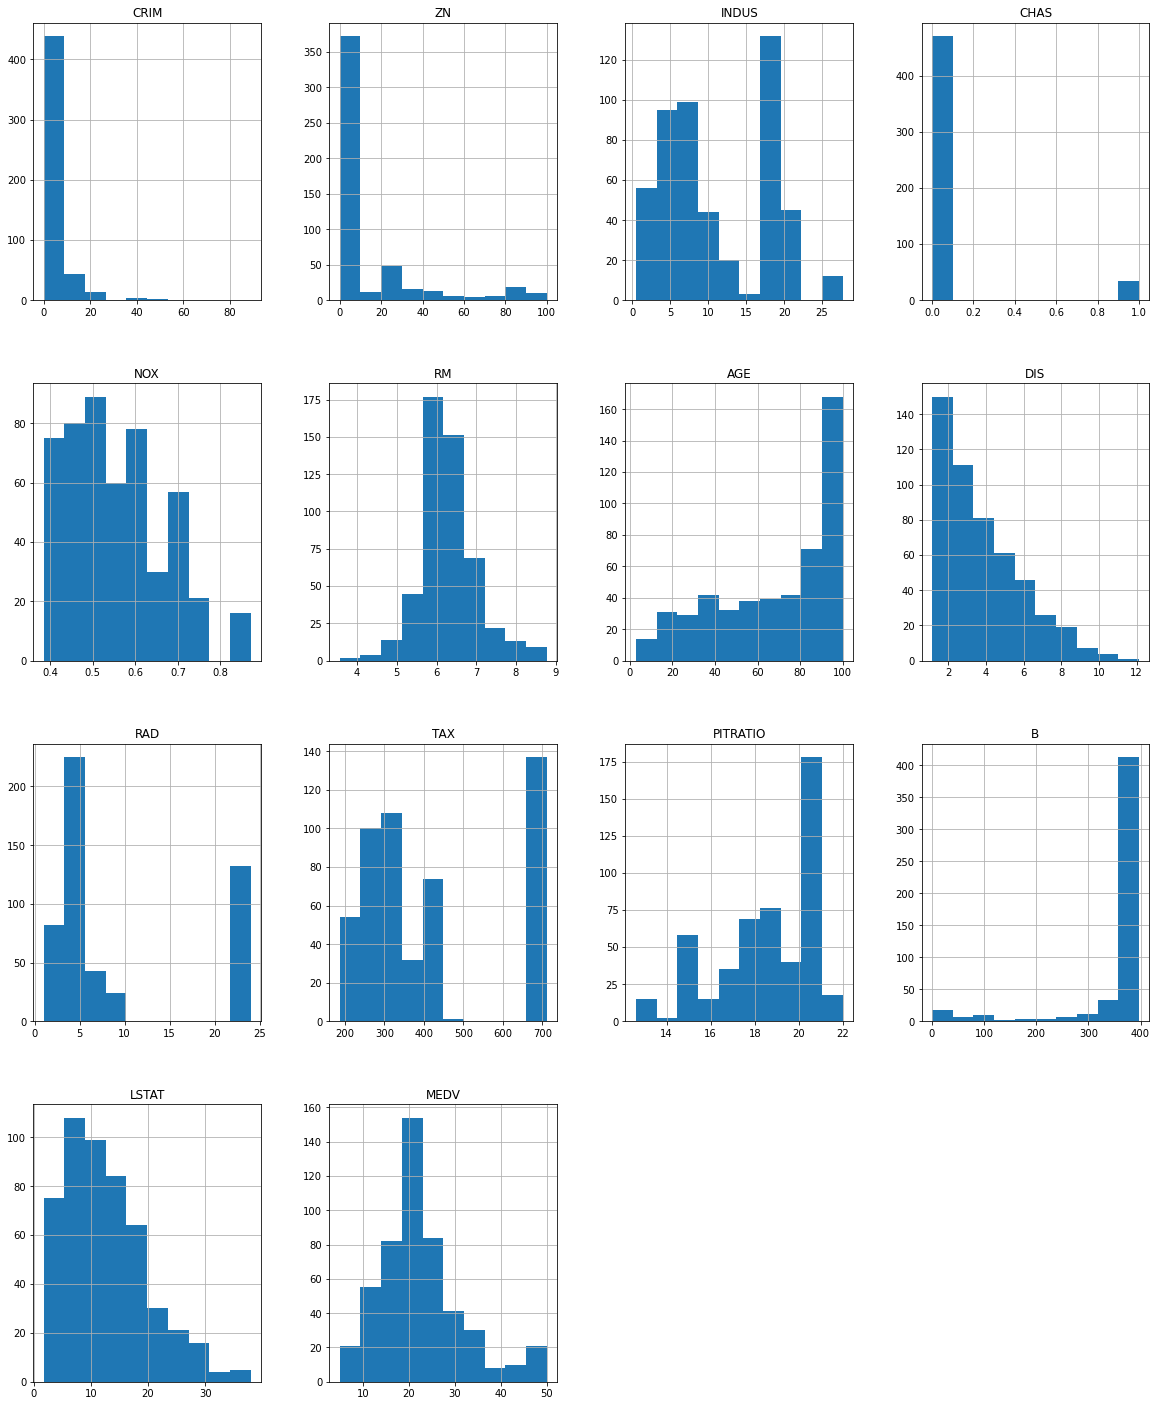

In [7]:
import matplotlib.pyplot as plt
housing.hist(figsize=(20,25))

plt.show()

# train test splitting

In [8]:
import sklearn

In [9]:
from sklearn.model_selection import StratifiedShuffleSplit

In [10]:
splitter=StratifiedShuffleSplit(n_splits=1,test_size=0.2,random_state=42)
for train,test in splitter.split(housing,housing['CHAS']):
    train_set=housing.loc[train]
    test_set=housing.loc[test]

In [11]:
train_set['CHAS'].value_counts()

0    376
1     28
Name: CHAS, dtype: int64

In [12]:
test_set['CHAS'].value_counts()

0    95
1     7
Name: CHAS, dtype: int64

In [13]:
28/376*(100 ), 7/95*(100)

(7.446808510638298, 7.368421052631578)

In [14]:
train_set

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PITRATIO,B,LSTAT,MEDV
254,0.04819,80.0,3.64,0,0.392,6.108,32.0,9.2203,1,315,16.4,392.89,6.57,21.9
348,0.01501,80.0,2.01,0,0.435,6.635,29.7,8.3440,4,280,17.0,390.94,5.99,24.5
476,4.87141,0.0,18.10,0,0.614,6.484,93.6,2.3053,24,666,20.2,396.21,18.68,16.7
321,0.18159,0.0,7.38,0,0.493,6.376,54.3,4.5404,5,287,19.6,396.90,6.87,23.1
326,0.30347,0.0,7.38,0,0.493,6.312,28.9,5.4159,5,287,19.6,396.90,6.15,23.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155,3.53501,0.0,19.58,1,0.871,6.152,82.6,1.7455,5,403,14.7,88.01,15.02,15.6
423,7.05042,0.0,18.10,0,0.614,6.103,85.1,2.0218,24,666,20.2,2.52,23.29,13.4
98,0.08187,0.0,2.89,0,0.445,7.820,36.9,3.4952,2,276,18.0,393.53,3.57,43.8
455,4.75237,0.0,18.10,0,0.713,6.525,86.5,2.4358,24,666,20.2,50.92,18.13,14.1


In [15]:
corr_matrix=housing.corr()
corr_matrix['MEDV'].sort_values(ascending=False)

MEDV        1.000000
RM          0.695360
ZN          0.360445
B           0.333461
DIS         0.249929
CHAS        0.175260
AGE        -0.376955
RAD        -0.381626
CRIM       -0.388305
NOX        -0.427321
TAX        -0.468536
INDUS      -0.483725
PITRATIO   -0.507787
LSTAT      -0.737663
Name: MEDV, dtype: float64

<AxesSubplot:xlabel='RM', ylabel='MEDV'>

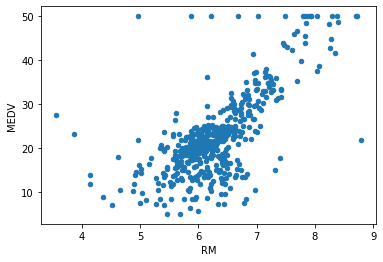

In [16]:
housing.plot(kind='scatter',x='RM',y='MEDV')

# pipeline

In [81]:
x_train=train_set.drop(columns=['MEDV'],axis=1)
y_train=train_set['MEDV']
x_test=test_set.drop(columns=['MEDV'],axis=1)
y_test=test_set['MEDV']

In [89]:
sample_features=x_train[:5]
sample_features
sample_lables=y_train[:5]
sample_lables

254    21.9
348    24.5
476    16.7
321    23.1
326    23.0
Name: MEDV, dtype: float64

In [19]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
pipe=Pipeline([('simpleimputer',SimpleImputer(strategy='median')),
               ('scaler',StandardScaler())])

In [82]:
x_train_scaled=pipe.fit_transform(x_train)
x_test_scaled=pipe.transform(x_test)

In [120]:
x_train_scaled[5]

array([ 1.29156014, -0.4898311 ,  0.98336806, -0.27288841,  0.33355876,
        0.52954844,  1.09697304, -1.05831353,  1.63579367,  1.50571521,
        0.81196637, -3.31778996,  1.16627212])

In [121]:
y_train[5]

28.7

## selecting desired model

In [86]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(x_train_scaled,y_train)

LinearRegression()

In [92]:
sample_scaled=pipe.fit_transform(sample_features)
sample_predict=model.predict(sample_scaled)
list(sample_predict)

[20.904471078954664,
 28.82280629040561,
 15.022614259709025,
 24.73759946071089,
 23.05953861318994]

In [91]:
list(sample_lables)

[21.9, 24.5, 16.7, 23.1, 23.0]

### evaluating model

In [93]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
predictions=model.predict(x_test_scaled)

In [96]:
print(mean_absolute_error(y_test,predictions),mean_squared_error(y_test,predictions),np.sqrt(mean_squared_error(y_test,predictions)))

3.0673884543350134 17.17124049875923 4.143819554319327


In [107]:
from sklearn.tree import DecisionTreeRegressor
model1=DecisionTreeRegressor()
model1.fit(x_train_scaled,y_train)

DecisionTreeRegressor()

In [108]:
predictions1=model1.predict(x_test_scaled)

In [109]:
print(mean_absolute_error(y_test,predictions1),mean_squared_error(y_test,predictions1),np.sqrt(mean_squared_error(y_test,predictions1)))

2.8872549019607843 15.104607843137254 3.8864646972714487


In [113]:
from sklearn.model_selection import cross_val_score
scores=cross_val_score(model1,x_train_scaled,y_train,scoring='neg_mean_squared_error')
rmse=np.sqrt(-scores)
rmse

array([4.97957557, 4.15256874, 5.43728554, 6.23630351, 3.40912379])

In [114]:
from sklearn.model_selection import cross_val_score
scores=cross_val_score(model,x_train_scaled,y_train,scoring='neg_mean_squared_error')
rmse=np.sqrt(-scores)
rmse

array([4.20871716, 4.48410772, 4.95812779, 6.34422858, 5.28053117])

In [119]:
from joblib import load,dump
dump(model1,r'dragonModel.pkl')


['dragonModel.pkl']